# **Hands-on lab: Exploratory Data Analysis - Laptops Pricing dataset**


In this lab, will use the skills acquired throughout the module, to explore the effect of different features on the price of laptops. 


# Objectives

After completing this lab will be able to:
 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`scipy`](https://docs.scipy.org/doc/scipy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for statistical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


In [ ]:
#import piplite
#await piplite.install('seaborn')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Import the dataset

You should download the modified version of the data set from the last module. 
Run the following code block to download the CSV file to this environment.


The functions below will download the dataset into your browser:


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [2]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [ ]:
await download(filepath, "laptops.csv")
file_name="laptops.csv"

Import the file to a pandas dataframe.


In [ ]:
df = pd.read_csv(file_name, header=0)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface. While working on the downloaded version of this notebook on their local machines, the learners can simply **skip the steps above**, and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=0)

Print the first 5 entries of the dataset to confirm loading.


In [7]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


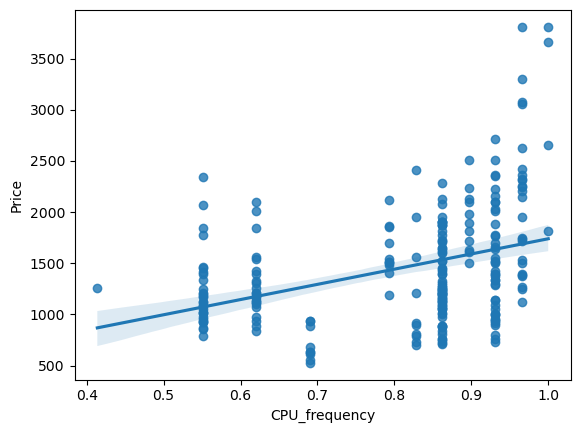

In [8]:
# Write your code below and press Shift+Enter to execute
# CPU_frequency plot
sns.regplot(x='CPU_frequency',y='Price',data=df)
plt.show()

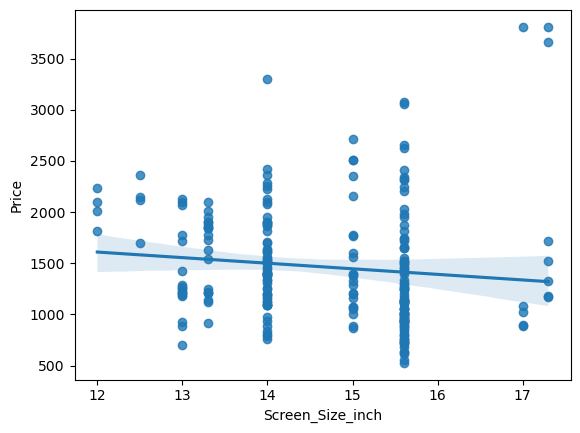

In [9]:
# Write your code below and press Shift+Enter to execute
# Screen_Size_inch plot
sns.regplot(x='Screen_Size_inch',y='Price',data=df)
plt.show()

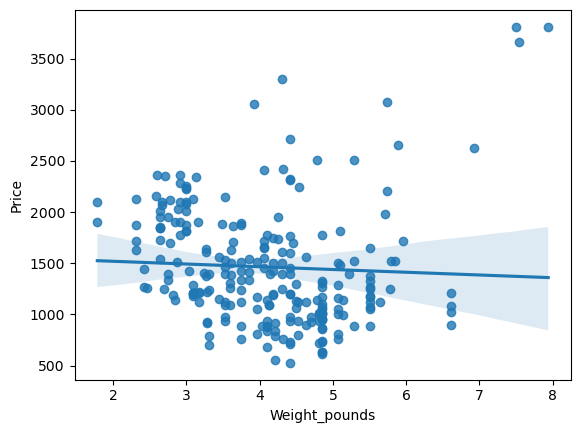

In [10]:
# Write your code below and press Shift+Enter to execute
# Weight_pounds plot
sns.regplot(x='Weight_pounds',y='Price',data=df)
plt.show()

In [13]:
# Correlation values of the three attributes with Price
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


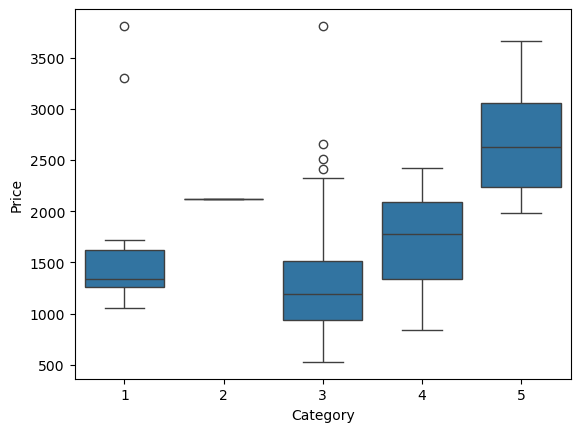

In [15]:
# Write your code below and press Shift+Enter to execute
# Category Box plot
sns.boxplot(x='Category',y='Price',data=df)
plt.show()

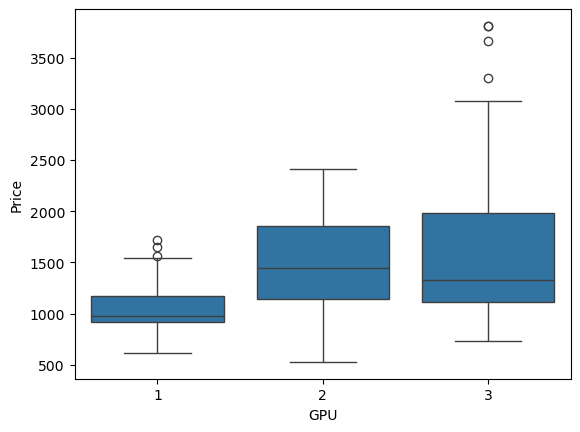

In [16]:
# Write your code below and press Shift+Enter to execute
# GPU Box plot
sns.boxplot(x='GPU',y='Price',data=df)
plt.show()

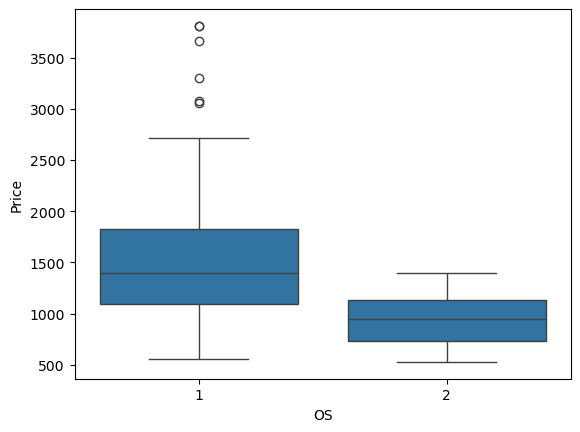

In [17]:
# Write your code below and press Shift+Enter to execute
# OS Box plot
sns.boxplot(x='OS',y='Price',data=df)
plt.show()

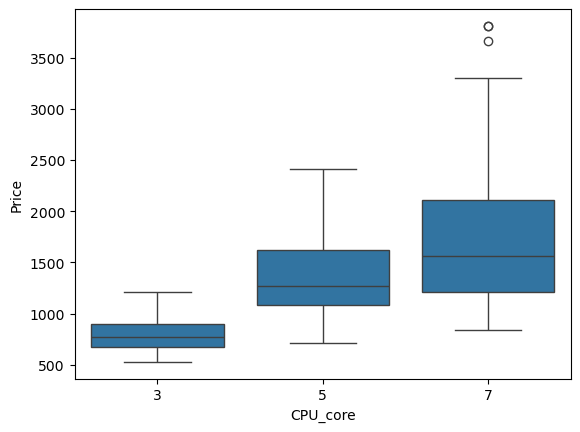

In [18]:
# Write your code below and press Shift+Enter to execute
# CPU_core Box plot
sns.boxplot(x='CPU_core',y='Price',data=df)
plt.show()

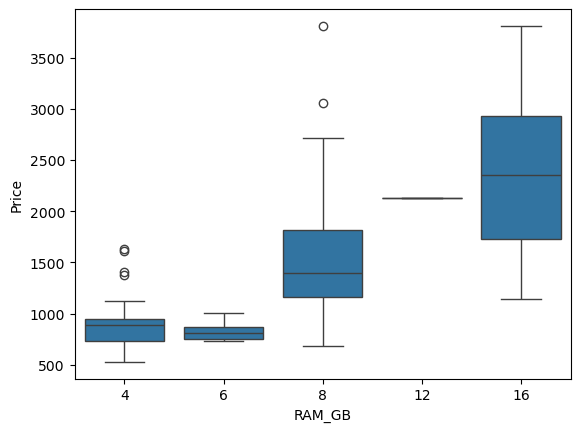

In [19]:
# Write your code below and press Shift+Enter to execute
# RAM_GB Box plot
sns.boxplot(x='RAM_GB',y='Price',data=df)
plt.show()

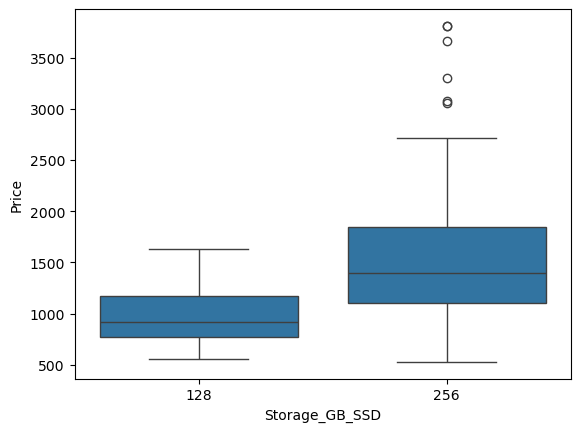

In [20]:
# Write your code below and press Shift+Enter to execute
# Storage_GB_SSD Box plot
sns.boxplot(x='Storage_GB_SSD',y='Price',data=df)
plt.show()

# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [23]:
# Write your code below and press Shift+Enter to execute
df.describe()
df.describe(include=['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [24]:
# Write your code below and press Shift+Enter to execute
# Create the group
df_test_1=df[['GPU','CPU_core','Price']]
group_test_1=df_test_1.groupby(['GPU','CPU_core'],as_index=False).mean()
group_test_1

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [25]:
# Write your code below and press Shift+Enter to execute
# Create the Pivot table
group_pivot=group_test_1.pivot(index='GPU',columns='CPU_core')
group_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

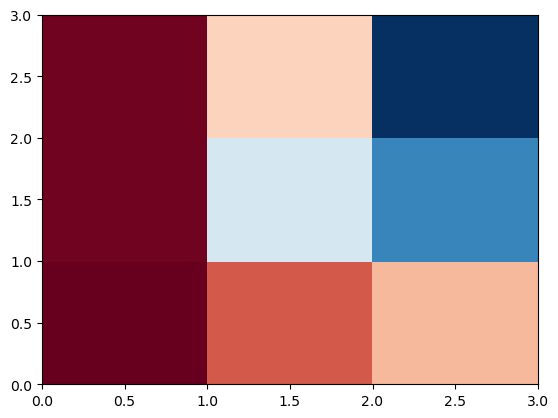

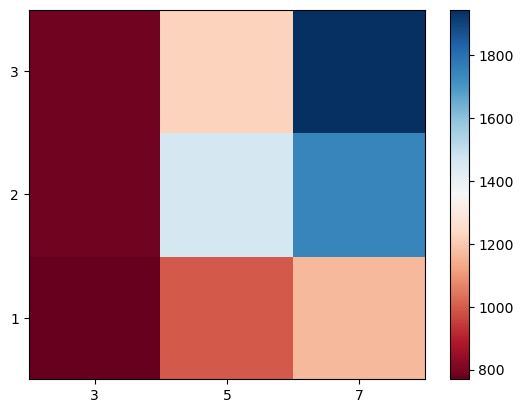

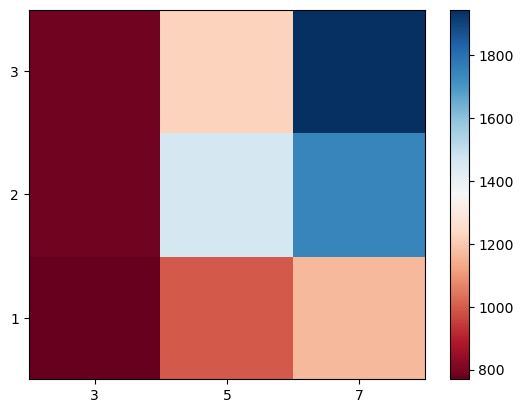

In [28]:
# Write your code below and press Shift+Enter to execute
# Create the Plot
fig,ax=plt.subplots()
im=ax.pcolor(group_pivot,cmap='RdBu')

row_labels=group_pivot.columns.levels[1]
col_labels=group_pivot.index

ax.set_xticks(np.arange(group_pivot.shape[1])+0.5,minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0])+0.5,minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
plt.show()

# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [29]:
# Write your code below and press Shift+Enter to execute
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coeff,p_value=stats.pearsonr(df[param],df['Price'])
    print(param)
    print('pearson_coeff: ',pearson_coeff,' p_value: ',p_value)

RAM_GB
pearson_coeff:  0.5492972971857841  p_value:  3.6815606288429613e-20
CPU_frequency
pearson_coeff:  0.36666555892588604  p_value:  5.5024633507134225e-09
Storage_GB_SSD
pearson_coeff:  0.2434207552181029  p_value:  0.00014898923191724174
Screen_Size_inch
pearson_coeff:  -0.11064420817118269  p_value:  0.08853397846830766
Weight_pounds
pearson_coeff:  -0.05031225837751549  p_value:  0.43976938534338944
CPU_core
pearson_coeff:  0.45939777733551157  p_value:  7.912950127009034e-14
OS
pearson_coeff:  -0.2217298011482738  p_value:  0.0005696642559246749
GPU
pearson_coeff:  0.2882981988881428  p_value:  6.166949698364282e-06
Category
pearson_coeff:  0.2862427558126413  p_value:  7.225696235806733e-06


# Highly Correlated & Significant Features

| Feature          | r (correlation) | p-value  | Interpretation                                                                                      |
| ---------------- | --------------- | -------- | --------------------------------------------------------------------------------------------------- |
| `RAM_GB`         | +0.55           | < 0.0001 | Strong positive correlation. More RAM is linked to higher target values (likely price/performance). |
| `CPU_core`       | +0.46           | < 0.0001 | More CPU cores correlate with higher output.                                                        |
| `CPU_frequency`  | +0.37           | < 0.0001 | Faster CPUs tend to increase the target variable.                                                   |
| `GPU`            | +0.29           | < 0.0001 | Better GPU associated with higher target.                                                           |
| `Category`       | +0.29           | < 0.0001 | Product category affects target — maybe business vs. gaming laptops.                                |
| `Storage_GB_SSD` | +0.24           | 0.00015  | SSD size has a moderate effect.                                                                     |
| `OS`             | -0.22           | 0.00057  | Negative correlation — some OS types may be cheaper or lower-performing.                            |


# Weak or Not Statistically Significant

| Feature            | r (correlation) | p-value | Interpretation                                                   |
| ------------------ | --------------- | ------- | ---------------------------------------------------------------- |
| `Screen_Size_inch` | -0.11           | 0.089   | Slight negative trend, not statistically significant (p > 0.05). |
| `Weight_pounds`    | -0.05           | 0.44    | Very weak correlation, not significant.                          |



# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


Copyright © 2023 IBM Corporation. All rights reserved.


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-18|0.2|Vicky Kuo|Reviewed and Revised|--!>
